#Deep Learning Project - Algorithms for Massive Data
#####By Giuseppe Scaffidi Caruso and Andrew Thomas Costa 

In [ ]:
#ANDREW KEY\ PASSWORD
#andrewcosta
#

#GIUSEPPE KEY\ PASSWORD
#giupisca25


###File Configuration

instructions:
1. if your kaggle json file has not been uploaded, enter 'y' into the prompt.
2. enter kaggle username 
3. enter api token

In [ ]:
from google.colab import files
import os
import json
import getpass

# Prompt the user for input
use_upload = input('Do you want to upload the Kaggle credentials file? (y/n): ')
if use_upload.lower() == 'y':
    # Upload the file
    uploaded = files.upload()

    # Rename the file to KaggleCredential.json
    for name in uploaded.keys():
        if 'kaggle' in name.lower():
            os.rename(name, 'KaggleCredential.json')
            break
else:
    # Manually input the credentials
    username = input('Enter your Kaggle username: ')
    password = getpass.getpass('Enter your Kaggle key: ')

    # Save the credentials to a JSON file
    credentials = {'username': username, 'key': password}
    with open('KaggleCredential.json', 'w') as f:
        json.dump(credentials, f)

# Load the credentials from the JSON file
with open('KaggleCredential.json', 'r') as f:
    credentials = json.load(f)

# Get the Kaggle username from the credentials
username = credentials['username']
password = credentials['key']

Do you want to upload the Kaggle credentials file? (y/n): n
Enter your Kaggle username: andrewcosta
Enter your Kaggle key: ··········


###Download Data

In [ ]:
import getpass
import json

# Save your credentials to a JSON file
credentials = {'username': username, 'key': password}
kaggle_dir = '/root/.kaggle'
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
with open(os.path.join(kaggle_dir, 'kaggle.json'), 'w') as f:
    json.dump(credentials, f)

# Set the file permissions to read/write only for the owner
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
import kaggle
import zipfile
import pandas as pd

In [ ]:
datasets = !kaggle datasets list -s "Plant Leaves image classification"
datasets

In [ ]:
dataset = datasets[2].split()[0]
dataset

In [ ]:
%%time
# Import necessary libraries
import kaggle
import zipfile

# Authenticate Kaggle API
kaggle.api.authenticate()

# Download the dataset
dataset = 'csafrit2/plant-leaves-for-image-classification'
kaggle.api.dataset_download_files(dataset)

# Extract the zip file to the current working directory (i.e., the root directory in Colab)
with zipfile.ZipFile('plant-leaves-for-image-classification.zip', 'r') as zip_ref:
    zip_ref.extractall()  # Extract to the current directory


CPU times: user 1min 3s, sys: 23.4 s, total: 1min 26s
Wall time: 6min 48s


In [ ]:
cfg_path = os.getcwd() #/content
root_dir = '/content/drive/'
input_path_train=  "Plants_2/train"
input_path_valid= "Plants_2/valid"
input_path_test= "Plants_2/test"
input_path_imagestopredict= "input/data/images_to_predict"
sizes = root_dir + input_path_train
train_path = os.path.join(cfg_path,input_path_train)
val_path = os.path.join(cfg_path,input_path_valid)
test_path = os.path.join(cfg_path,input_path_test)



###Data Preparation

RGB channels are within range [0, 255]. Rescale to better feed the NN.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.utils import class_weight

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [ ]:
HEIGHT = 64
WIDTH = 64
BATCH = 50

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
                                  train_path,
                                  image_size=(HEIGHT,WIDTH), 
                                  interpolation="mitchellcubic",
                                  crop_to_aspect_ratio=True,
                                  seed=42, 
                                  shuffle=True, 
                                  batch_size=BATCH
                                  )

val_data = tf.keras.utils.image_dataset_from_directory(
                                  val_path,
                                  image_size=(HEIGHT,WIDTH), 
                                  interpolation="mitchellcubic",
                                  crop_to_aspect_ratio=True,
                                  seed=42, 
                                  shuffle=True, 
                                  batch_size=BATCH
                                  )

test_data = tf.keras.utils.image_dataset_from_directory(
                                  test_path,
                                  image_size=(HEIGHT,WIDTH), 
                                  interpolation="mitchellcubic",
                                  crop_to_aspect_ratio=True,
                                  seed=42, 
                                  shuffle=True, 
                                  batch_size=BATCH
                                  )

Found 4274 files belonging to 22 classes.
Found 110 files belonging to 22 classes.
Found 110 files belonging to 22 classes.


In [ ]:
train_classes = train_data.class_names
train_classes

In [ ]:
class_weights = class_weight.compute_class_weight(class_weight = 'balanced', 
                                                  classes = np.unique(train_classes), 
                                                  y = train_classes)
class_weights_ = dict(zip(np.unique(train_classes), class_weights))
class_weights_
#class_weights = enumerate(class_weights)
#class_weights
class_weight_dict = dict(enumerate(class_weights))
#class_weight_dict
class_weights = {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0}


In [ ]:
class_weights_

{'Alstonia Scholaris diseased (P2a)': 1.0,
 'Alstonia Scholaris healthy (P2b)': 1.0,
 'Arjun diseased (P1a)': 1.0,
 'Arjun healthy (P1b)': 1.0,
 'Bael diseased (P4b)': 1.0,
 'Basil healthy (P8)': 1.0,
 'Chinar diseased (P11b)': 1.0,
 'Chinar healthy (P11a)': 1.0,
 'Gauva diseased (P3b)': 1.0,
 'Gauva healthy (P3a)': 1.0,
 'Jamun diseased (P5b)': 1.0,
 'Jamun healthy (P5a)': 1.0,
 'Jatropha diseased (P6b)': 1.0,
 'Jatropha healthy (P6a)': 1.0,
 'Lemon diseased (P10b)': 1.0,
 'Lemon healthy (P10a)': 1.0,
 'Mango diseased (P0b)': 1.0,
 'Mango healthy (P0a)': 1.0,
 'Pomegranate diseased (P9b)': 1.0,
 'Pomegranate healthy (P9a)': 1.0,
 'Pongamia Pinnata diseased (P7b)': 1.0,
 'Pongamia Pinnata healthy (P7a)': 1.0}

In [ ]:
import numpy as np
from PIL import Image

data = []

for i, batch in enumerate(train_data):
    inputs, targets = batch
    for j in range(inputs.shape[0]):
        image = inputs[j].numpy()
        image = (image * 255).astype(np.uint8)
        filename = f"batch_{i}_image_{j}.jpg"
        with Image.fromarray(image) as img:
            width, height = img.size
            data.append({'filename': filename, 'width': width, 'height': height})

df = pd.DataFrame(data)

In [ ]:
df.nunique()

filename    4274
width          1
height         1
dtype: int64

In [ ]:
data = []

for i, batch in enumerate(val_data):
    inputs, targets = batch
    for j in range(inputs.shape[0]):
        image = inputs[j].numpy()
        image = (image * 255).astype(np.uint8)
        filename = f"batch_{i}_image_{j}.jpg"
        with Image.fromarray(image) as img:
            width, height = img.size
            data.append({'filename': filename, 'width': width, 'height': height})

val_df = pd.DataFrame(data)
val_df.head()

,filename,width,height
0,batch_0_image_0.jpg,256,256
1,batch_0_image_1.jpg,256,256
2,batch_0_image_2.jpg,256,256
3,batch_0_image_3.jpg,256,256
4,batch_0_image_4.jpg,256,256


In [ ]:
val_df.nunique()

filename    110
width         1
height        1
dtype: int64

In [ ]:
data = []

for i, batch in enumerate(test_data):
    inputs, targets = batch
    for j in range(inputs.shape[0]):
        image = inputs[j].numpy()
        image = (image * 255).astype(np.uint8)
        filename = f"batch_{i}_image_{j}.jpg"
        with Image.fromarray(image) as img:
            width, height = img.size
            data.append({'filename': filename, 'width': width, 'height': height})

test_df = pd.DataFrame(data)
test_df.head()

,filename,width,height
0,batch_0_image_0.jpg,256,256
1,batch_0_image_1.jpg,256,256
2,batch_0_image_2.jpg,256,256
3,batch_0_image_3.jpg,256,256
4,batch_0_image_4.jpg,256,256


In [ ]:
test_df.nunique()

filename    110
width         1
height        1
dtype: int64

In [ ]:
class_names = train_data.class_names
class_names

['Alstonia Scholaris diseased (P2a)',
 'Alstonia Scholaris healthy (P2b)',
 'Arjun diseased (P1a)',
 'Arjun healthy (P1b)',
 'Bael diseased (P4b)',
 'Basil healthy (P8)',
 'Chinar diseased (P11b)',
 'Chinar healthy (P11a)',
 'Gauva diseased (P3b)',
 'Gauva healthy (P3a)',
 'Jamun diseased (P5b)',
 'Jamun healthy (P5a)',
 'Jatropha diseased (P6b)',
 'Jatropha healthy (P6a)',
 'Lemon diseased (P10b)',
 'Lemon healthy (P10a)',
 'Mango diseased (P0b)',
 'Mango healthy (P0a)',
 'Pomegranate diseased (P9b)',
 'Pomegranate healthy (P9a)',
 'Pongamia Pinnata diseased (P7b)',
 'Pongamia Pinnata healthy (P7a)']

In [ ]:
num_classes = len(class_names)
num_classes

22

###Exploratory Data Analysis

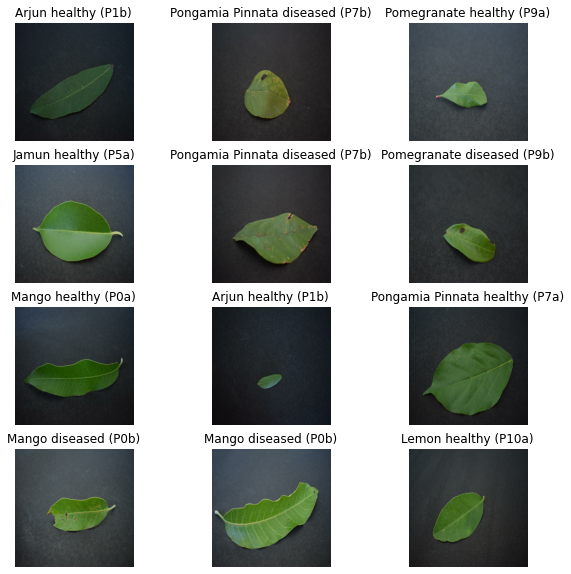

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_data.take(1):
  for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


###Model Preparation and Deployment

In [ ]:
!pip install --upgrade tensorflow keras

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import preprocessing

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score

train_aug = Sequential([
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical", 
                                                     input_shape = (HEIGHT, WIDTH, 3)),
        layers.experimental.preprocessing.RandomZoom(
                height_factor=(-0.05, -0.15),
                width_factor=(-0.05, -0.15),
                fill_mode='nearest'
            ),
        layers.RandomBrightness(0.2),
        layers.RandomContrast(0.2),
        layers.RandomTranslation(0.05, 0.05),
        layers.RandomRotation(0.2)
])

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

1.   Baseline Model




In [ ]:
def base_model():
  model = Sequential()
  #model.add(train_aug)
  model.add(layers.Conv2D(16, kernel_size=(3,3), padding = 'same', activation = 'relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(32, kernel_size=(3,3), padding = 'same', activation = 'relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(layers.MaxPooling2D())
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation = 'relu'))
  model.add(layers.Dense(num_classes))

  model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy'])
  
  return model


In [ ]:
b_model = base_model()

In [ ]:
b_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 64)        

In [ ]:
%%time
EPOCHS = 10
base_history = b_model.fit(train_data,
                           validation_data = val_data,
                           epochs = EPOCHS,
                           class_weight=class_weights)

Epoch 1/10
86/86 [==============================] - 542s 172ms/step - loss: 4.2078 - accuracy: 0.2993 - val_loss: 2.0539 - val_accuracy: 0.2909
Epoch 2/10
86/86 [==============================] - 1s 6ms/step - loss: 1.1128 - accuracy: 0.6661 - val_loss: 1.1587 - val_accuracy: 0.6364
Epoch 3/10
86/86 [==============================] - 0s 6ms/step - loss: 0.6677 - accuracy: 0.8004 - val_loss: 1.1849 - val_accuracy: 0.6545
Epoch 4/10
86/86 [==============================] - 0s 5ms/step - loss: 0.4492 - accuracy: 0.8624 - val_loss: 1.2650 - val_accuracy: 0.6909
Epoch 5/10
86/86 [==============================] - 0s 5ms/step - loss: 0.2993 - accuracy: 0.9024 - val_loss: 1.3084 - val_accuracy: 0.6636
Epoch 6/10
86/86 [==============================] - 0s 6ms/step - loss: 0.2593 - accuracy: 0.9172 - val_loss: 1.2290 - val_accuracy: 0.7364
Epoch 7/10
86/86 [==============================] - 1s 6ms/step - loss: 0.1224 - accuracy: 0.9670 - val_loss: 1.1217 - val_accuracy: 0.7818
Epoch 8/10
86/86

Baseline Results

<AxesSubplot:>

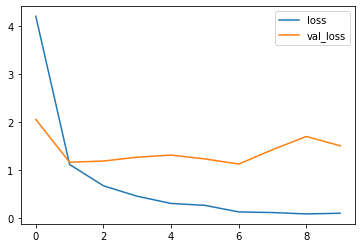

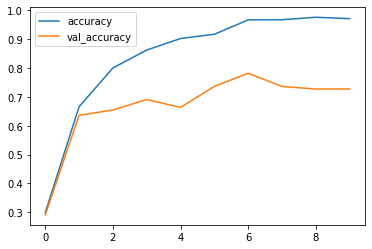

In [ ]:
history_df = pd.DataFrame(base_history.history)
history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()

In [ ]:
from tqdm import tqdm

trues = []
preds = []
for img, label in tqdm(test_data):
  pred = b_model.predict(img, verbose=0)
  pred = pred.argmax(-1)
  trues.append(label[0])
  preds.append(pred[0])

100%|██████████| 3/3 [00:13<00:00,  4.60s/it]


In [ ]:
f1_score(trues, preds, average='macro')

0.5

In [ ]:
recall_score(trues, preds, average='macro', zero_division = 'warn')

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5

In [ ]:
precision_score(trues, preds, average='macro', zero_division = 'warn')

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5

2.   Second Model



In [ ]:
def second_model():
  model = Sequential()
  model.add(layers.Rescaling(1./255, input_shape = (HEIGHT, WIDTH, 3)))
  model.add(layers.Conv2D(16, kernel_size=(3,3), padding = 'same', activation = 'relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(32, kernel_size=(3,3), padding = 'same', activation = 'relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())
  model.add(layers.Conv2D(64, kernel_size=(3,3), padding = 'same', activation = 'relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(num_classes, 'softmax'))

  model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy'])
  
  return model

In [ ]:
second_model = second_model()

In [ ]:
second_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)      

In [ ]:
%%time
EPOCHS = 30
second_history = second_model.fit(train_data,
                                  validation_data = val_data,
                                  epochs = EPOCHS,
                                  class_weight = class_weights)

Epoch 1/30


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 [==============================] - 3s 11ms/step - loss: 1.1855 - accuracy: 0.6462 - val_loss: 5.1402 - val_accuracy: 0.0455
Epoch 2/30
86/86 [==============================] - 1s 7ms/step - loss: 0.3619 - accuracy: 0.8856 - val_loss: 9.1625 - val_accuracy: 0.0455
Epoch 3/30
86/86 [==============================] - 1s 7ms/step - loss: 0.1959 - accuracy: 0.9394 - val_loss: 10.9866 - val_accuracy: 0.0545
Epoch 4/30
86/86 [==============================] - 1s 7ms/step - loss: 0.0997 - accuracy: 0.9724 - val_loss: 8.4176 - val_accuracy: 0.1364
Epoch 5/30
86/86 [==============================] - 1s 7ms/step - loss: 0.1056 - accuracy: 0.9682 - val_loss: 6.1218 - val_accuracy: 0.2182
Epoch 6/30
86/86 [==============================] - 1s 8ms/step - loss: 0.0768 - accuracy: 0.9806 - val_loss: 3.4523 - val_accuracy: 0.3727
Epoch 7/30
86/86 [==============================] - 1s 7ms/step - loss: 0.0280 - accuracy: 0.9949 - val_loss: 1.8207 - val_accuracy: 0.6182
Epoch 8/30
86/86 [===========

Model 2 Results

<AxesSubplot:>

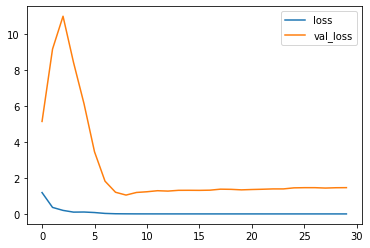

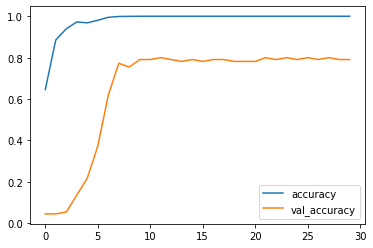

In [ ]:
history_df = pd.DataFrame(second_history.history)
history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()

In [ ]:
from tqdm import tqdm

trues = []
preds = []
for img, label in tqdm(test_data):
  pred = second_model.predict(img, verbose=0)
  pred = pred.argmax(-1)
  trues.append(label[0])
  preds.append(pred[0])

100%|██████████| 3/3 [00:15<00:00,  5.12s/it]


In [ ]:
f1_score(trues, preds, average='macro')

1.0

In [ ]:
recall_score(trues, preds, average='macro', zero_division = 'warn')

1.0

In [ ]:
precision_score(trues, preds, average='macro', zero_division = 'warn')

1.0

3.   Model 3



In [ ]:
def third_model():
  model = Sequential()
  #model.add(train_aug)
  model.add(layers.Rescaling(1./255, input_shape = (HEIGHT, WIDTH, 3)))
  model.add(layers.Conv2D(16, kernel_size=(3,3), padding = 'same', activation = 'relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D())
  model.add(layers.Flatten())
  model.add(layers.Dense(num_classes))

  model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001),
                loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics = ['accuracy'])
  
  return model

In [ ]:
third_model = third_model()

In [ ]:
third_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 batch_normalization_3 (Batc  (None, 64, 64, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 16384)             0         
                                                                 
 dense_8 (Dense)             (None, 22)               

In [ ]:
%%time
EPOCHS = 10
third_history = third_model.fit(train_data,
                                validation_data = val_data,
                                epochs = EPOCHS,
                                class_weight = class_weights)

Epoch 1/10
86/86 [==============================] - 2s 7ms/step - loss: 1.3199 - accuracy: 0.6221 - val_loss: 2.4826 - val_accuracy: 0.3545
Epoch 2/10
86/86 [==============================] - 0s 5ms/step - loss: 0.3598 - accuracy: 0.8975 - val_loss: 2.2169 - val_accuracy: 0.4182
Epoch 3/10
86/86 [==============================] - 0s 5ms/step - loss: 0.1843 - accuracy: 0.9499 - val_loss: 1.8109 - val_accuracy: 0.5636
Epoch 4/10
86/86 [==============================] - 0s 5ms/step - loss: 0.0863 - accuracy: 0.9796 - val_loss: 1.3811 - val_accuracy: 0.6182
Epoch 5/10
86/86 [==============================] - 0s 5ms/step - loss: 0.0388 - accuracy: 0.9909 - val_loss: 1.1579 - val_accuracy: 0.6455
Epoch 6/10
86/86 [==============================] - 0s 5ms/step - loss: 0.0172 - accuracy: 0.9979 - val_loss: 1.0090 - val_accuracy: 0.7636
Epoch 7/10
86/86 [==============================] - 0s 5ms/step - loss: 0.0126 - accuracy: 0.9993 - val_loss: 1.0868 - val_accuracy: 0.7364
Epoch 8/10
86/86 [==

In [ ]:
from tqdm import tqdm

trues = []
preds = []
for img, label in tqdm(test_data):
  pred = third_model.predict(img, verbose=0)
  pred = pred.argmax(-1)
  trues.append(label[0])
  preds.append(pred[0])

100%|██████████| 3/3 [00:13<00:00,  4.38s/it]


In [ ]:
f1_score(trues, preds, average = 'macro')

0.5

In [ ]:
recall_score(trues, preds, average = 'macro')

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5

Model 3 Results

<AxesSubplot:>

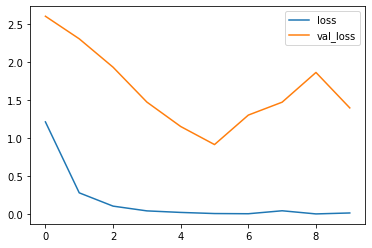

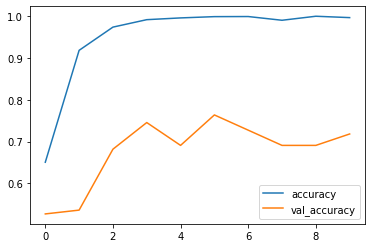

In [ ]:
history_df = pd.DataFrame(third_history.history)
history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()

###Hyperparameter Tuning

In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.1 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from keras_tuner import HyperModel, RandomSearch
from keras.metrics import AUC, Precision, Recall, Accuracy
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir /keras_tuner_dir/tb_logs

In [ ]:
%%time
#%reload_ext tensorboard
def build_model(hp):
    # create model object
      model = Sequential()
      #model.add(train_aug)
      model.add(layers.Rescaling(1./255))
    #adding first convolutional layer    
      model.add(layers.Conv2D(filters=hp.Int('conv_1_filter', min_value=8, max_value=128, step=15), kernel_size=hp.Choice('conv_1_kernel', values = [3,5]), activation='relu', input_shape=(HEIGHT, WIDTH, 3)))
      model.add(layers.MaxPooling2D())
    # adding second convolutional layer 
      model.add(layers.Conv2D(filters=hp.Int('conv_2_filter', min_value=16, max_value=128, step=15),kernel_size=hp.Choice('conv_2_kernel', values = [3,5]), activation='relu'))  
      model.add(layers.MaxPooling2D())
    # adding third convolutional layer
      model.add(layers.Conv2D(filters=hp.Int('conv_3_filter', min_value=16, max_value=128, step=15),kernel_size=hp.Choice('conv_3_kernel', values = [3,5]), activation='relu'))    
      model.add(layers.MaxPooling2D())
      model.add(layers.Flatten())
    # adding dense layer    
      model.add(layers.Dense(units=hp.Int('dense_1_units', min_value=16, max_value=128, step=16),activation='relu'))
      model.add(layers.Dense(units=hp.Int('dense_2_units', min_value=16, max_value=128, step=16),activation='relu'))
    # output layer    
      model.add(layers.Dense(22, activation='softmax'))

    #compilation of model
      model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
      return model

tuner_ = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='keras_tuner_dir',
    project_name='keras_tuner_demo2'
)

tuner_.search(train_data, 
              epochs=5, 
              validation_data=(val_data),
              callbacks=[keras.callbacks.TensorBoard("/keras_tuner_dir/tb_logs")])

#%tensorboard --logdir /keras_tuner_dir/tb_logs

Trial 30 Complete [00h 06m 28s]
val_accuracy: 0.04545454680919647

Best val_accuracy So Far: 0.5454545617103577
Total elapsed time: 01h 21m 51s
CPU times: user 4h 1min 27s, sys: 51min 9s, total: 4h 52min 37s
Wall time: 1h 21min 53s


*********
***Nota Bene***

If running in Colab, the following two commands will show you the TensorBoard inside Colab:

```
%load_ext tensorboard

%tensorboard --logdir /keras_tuner_dir/tb_logs
```




********
Ref.: https://keras.io/guides/keras_tuner/visualize_tuning/

###Test Tuned Model

In [ ]:
model = tuner_.get_best_models(num_models=1)[0]
#summary of best model
#model.summary()

In [ ]:
model.fit(train_data,
          epochs=10,
          validation_data=(val_data)
          )

Epoch 1/10
134/134 [==============================] - 46s 284ms/step - loss: 1.7068 - accuracy: 0.4328 - val_loss: 1.6870 - val_accuracy: 0.4091
Epoch 2/10
134/134 [==============================] - 38s 286ms/step - loss: 1.3801 - accuracy: 0.5288 - val_loss: 1.8397 - val_accuracy: 0.4909
Epoch 3/10
134/134 [==============================] - 38s 284ms/step - loss: 1.2456 - accuracy: 0.5730 - val_loss: 1.8735 - val_accuracy: 0.4455
Epoch 4/10
134/134 [==============================] - 38s 281ms/step - loss: 1.1089 - accuracy: 0.6259 - val_loss: 2.4401 - val_accuracy: 0.3909
Epoch 5/10
134/134 [==============================] - 38s 281ms/step - loss: 1.0599 - accuracy: 0.6355 - val_loss: 2.6718 - val_accuracy: 0.2727
Epoch 6/10
134/134 [==============================] - 38s 283ms/step - loss: 1.0601 - accuracy: 0.6359 - val_loss: 3.0341 - val_accuracy: 0.3455
Epoch 7/10
134/134 [==============================] - 38s 282ms/step - loss: 0.9392 - accuracy: 0.6825 - val_loss: 3.0992 - val_ac

In [ ]:
from tqdm import tqdm

trues = []
preds = []
for img, label in tqdm(test_data):
  pred = model.predict(img, verbose=0)
  pred = pred.argmax(-1)
  trues.append(label[0])
  preds.append(pred[0])

100%|██████████| 4/4 [00:02<00:00,  1.99it/s]


In [ ]:
f1_score(trues, preds, average='macro')

0.3333333333333333

In [ ]:
precision_score(trues, preds, average='macro')

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3

In [ ]:
recall_score(trues, preds, average='macro')

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4

###Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
confusion_matrix(trues, preds)

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0]])